In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OneHotEncoder

df_bike = pd.read_csv("Bike.csv")

df_bike.rename(columns={'cnt': 'cnt_rental_bike'}, inplace=True)

In [4]:
# 1

print(df_bike.head())
print(df_bike.shape)
print(df_bike.dtypes)

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           1  0.24  0.2879  0.81        0.0       3          13   
1           1  0.22  0.2727  0.80        0.0       8          32   
2           1  0.22  0.2727  0.80        0.0       5          27   
3           1  0.24  0.2879  0.75        0.0       3          10   
4           1  0.24  0.2879  0.75        0.0       0           1   

   cnt_rental_bike  
0               16  
1               40  
2               32  
3               13  
4                

In [5]:
# 2
df_bike.isnull().sum()

instant            0
dteday             0
season             0
yr                 0
mnth               0
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
casual             0
registered         0
cnt_rental_bike    0
dtype: int64

In [6]:
# 3
print(df_bike.duplicated().sum())

0


In [7]:
# 4
df_bike['datetime'] = pd.to_datetime(df_bike['dteday']) + pd.to_timedelta(df_bike['hr'], 'h')
print(df_bike[['instant', 'season', 'datetime']].head())

   instant  season            datetime
0        1       1 2011-01-01 00:00:00
1        2       1 2011-01-01 01:00:00
2        3       1 2011-01-01 02:00:00
3        4       1 2011-01-01 03:00:00
4        5       1 2011-01-01 04:00:00


In [8]:
# 5
df_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,datetime
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-04 22:30:00
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-02 21:00:00
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-02 06:30:00
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 23:00:00
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN


In [9]:
# 6
print('Number of bike rentals:', df_bike['cnt_rental_bike'].sum())
print('Average:', df_bike['cnt_rental_bike'].mean())
print('Minimal:', df_bike['cnt_rental_bike'].min())
print('Maximum:', df_bike['cnt_rental_bike'].max())

Number of bike rentals: 3292679
Average: 189.46308763450142
Minimal: 1
Maximum: 977


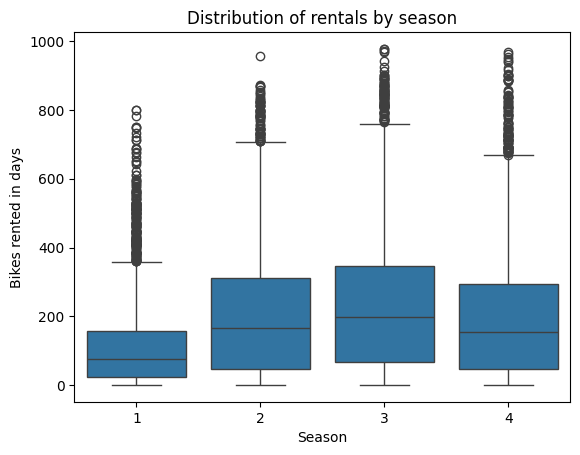

In [10]:
# 7
import seaborn as sns

sns.boxplot(x = 'season', y = 'cnt_rental_bike', data=df_bike)
plt.xlabel('Season')
plt.ylabel('Bikes rented in days')
plt.title('Distribution of rentals by season')
plt.show()

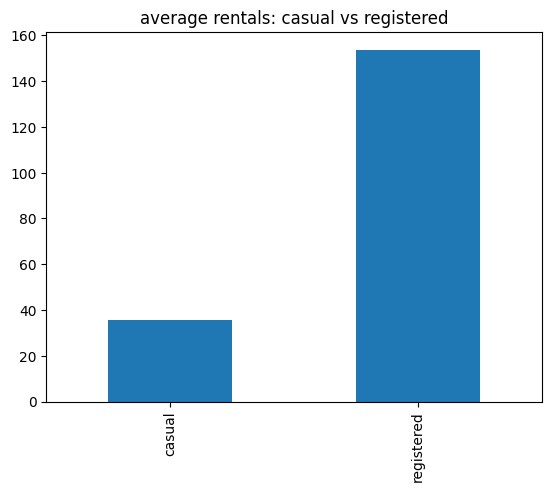

In [12]:
# 8 
df_bike[['casual', 'registered']].mean().plot(kind='bar')
plt.title('average rentals: casual vs registered')
plt.show()

In [23]:
mapping = {
    1: 'clear',
    2: 'cloudy',
    3: 'light_rain',
    4: 'heavy_rain'
}
df_bike['weathersit'] = df_bike['weathersit'].replace(mapping)
df_bike['weathersit'].unique()

array(['clear', 'cloudy', 'light_rain', 'heavy_rain'], dtype=object)

In [24]:
df_bike['weathersit'].dtype

dtype('O')

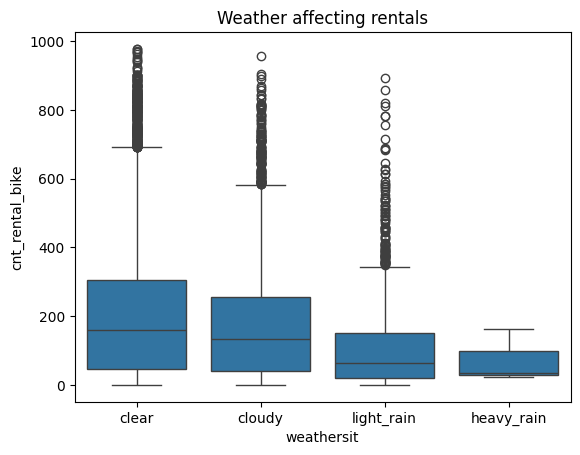

In [27]:
sns.boxplot(x = 'weathersit', y = 'cnt_rental_bike', data = df_bike)
plt.title('Weather affecting rentals')
plt.show()

In [35]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df_bike[['cnt_rental_bike']]).toarray()
print(encoded[:5]) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [37]:
encoder = OneHotEncoder(sparse_output=False)  
encoded = encoder.fit_transform(df_bike[['weathersit']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['weathersit']))
df_bike = pd.concat([df_bike.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print(df_bike.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

  weathersit  ...  registered  cnt_rental_bike            datetime  \
0      clear  ...          13               16 2011-01-01 00:00:00   
1      clear  ...          32               40 2011-01-01 01:00:00   
2      clear  ...          27               32 2011-01-01 02:00:00   
3      clear  ...          10               13 2011-01-01 03:00:00   
4      clear  ...           1                1 2011-01-01 04:00:00   

  weathersit_cloudy  weathersit_heavy_rain  weathersit_light_rain  \
0               0.0                    0.

In [ ]:
encoder = OneHotEncoder(drop='first') 
enci
encoded_lineary_dependent = encoder.fit_transform(df_bike[['season_encoder']])
encoded_lineary_independent = enco
# This happening because of size of linear space of columns from encoded matrix is k - 1, where k is size of encoded matrix

   season  season_encoded
0       1             0.0
1       1             0.0
2       1             0.0
3       1             0.0
4       1             0.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()
df_bike['season_encoded'] = ordinal_encoder.fit_transform(df_bike[['season']])
print(df_bike[['season', 'season_encoded']].head())

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()
df_bike['temp_norm'] = scaler_minmax.fit_transform(df_bike[['temp']])
df_bike['temp_std'] = scaler_std.fit_transform(df_bike[['temp']])
print(df_bike[['temp', 'temp_norm', 'temp_std']].head())

   temp  temp_norm  temp_std
0  0.24   0.224490 -1.334648
1  0.22   0.204082 -1.438516
2  0.22   0.204082 -1.438516
3  0.24   0.224490 -1.334648
4  0.24   0.224490 -1.334648


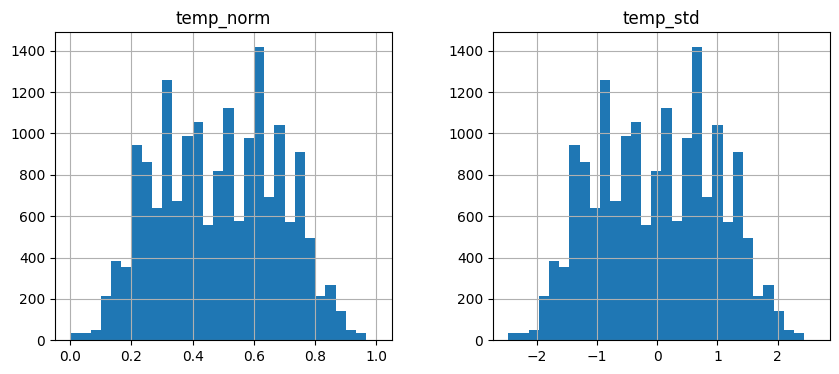

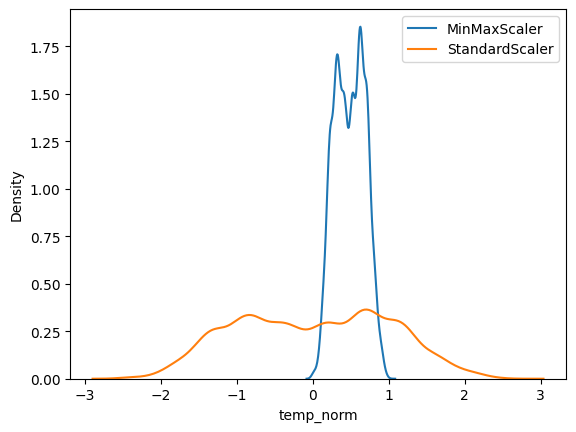

In [43]:
import matplotlib.pyplot as plt

df_bike[['temp_norm', 'temp_std']].hist(bins=30, figsize=(10,4))
plt.show()

import seaborn as sns

sns.kdeplot(df_bike['temp_norm'], label='MinMaxScaler')
sns.kdeplot(df_bike['temp_std'], label='StandardScaler')
plt.legend()
plt.show()

# 1. (B) Nominal.

# 2. Nominal - categories without order (colors, for example); Ordinal - categories with natural order (education level, for example).

# 3. (A) True.

# 4. The sum of the values ​​in these n columns = 1 for each row so the total sum is number of rows.

# 5. To avoid linear dependenc between this kind of columns, they can be represented through each other. The term is multicollinearity.

# 6. I think Ordinal Encoding cause these ordered categories.

# 7. For example if theres a 'country" feature with 200 categories so, you will get 200 new columns.

# 8. (B) Standardization.

# 9. (B) False.

# 10. min=10, max=53, range=43; (10-10)/43 = 0.00, (22-10)/43 = 0.28, (27-10)/43 = 0.40, (53-10)/43 = 1.00; scale = {0.00, 0.28, 0.40, 1.00}.

# 11. (75-50)/10 = 2.5.

# 12. This is especially important for scale-sensitive models, for example: linear regression, KNN.